In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_excel('F:\\Downloads\\Big Leader\\GS Project Big leader\\GS Data Edited.xlsx')

In [3]:
# 811개 실험 데이터 , 90개 재료 (X) , 7개 물성치 (y)

data.shape

(811, 97)

In [4]:
# X : 재료 (feature) , y : 물성치 (target)

X = data.iloc[:,:90]
y = data.iloc[:,90:97]

In [5]:
# X (재료) 는 Base resin, Filler, Rubber, Others 로 구분됨
# Base resin : P000 , Filler : F000 , Rubber : R000 , Others : OTH0
# Base resin , Filler , Rubber , Others 가 일정한 비율로 총 100퍼센트를 이루는 데이터
# Example : P001=40% , F001=30% , R001=20% , OTH1=10%  --> Total=100%

X.columns

Index(['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009',
       'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018',
       'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025', 'P026', 'P027',
       'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034', 'P035', 'P036',
       'P037', 'P038', 'P039', 'P040', 'P041', 'F001', 'F002', 'F003', 'F004',
       'F005', 'F006', 'F007', 'F008', 'F009', 'F010', 'F011', 'F012', 'F013',
       'F014', 'F015', 'F016', 'F017', 'F018', 'R001', 'R002', 'R003', 'R004',
       'R005', 'R006', 'R007', 'R008', 'R009', 'R010', 'R011', 'R012', 'R013',
       'R014', 'R015', 'R016', 'R017', 'R018', 'R019', 'R020', 'R021', 'R022',
       'OTH1', 'OTH2', 'OTH3', 'OTH4', 'OTH5', 'OTH6', 'OTH7', 'OTH8', 'OTH9'],
      dtype='object')

In [21]:
# Base resin

X_P = data.iloc[:,:41]
X_P.columns

Index(['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009',
       'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018',
       'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025', 'P026', 'P027',
       'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034', 'P035', 'P036',
       'P037', 'P038', 'P039', 'P040', 'P041'],
      dtype='object')

In [23]:
# Filler

X_F = X.iloc[:,41:59]
X_F.columns

Index(['F001', 'F002', 'F003', 'F004', 'F005', 'F006', 'F007', 'F008', 'F009',
       'F010', 'F011', 'F012', 'F013', 'F014', 'F015', 'F016', 'F017', 'F018'],
      dtype='object')

In [25]:
# Rubber

X_R = X.iloc[:,59:81]
X_R.columns

Index(['R001', 'R002', 'R003', 'R004', 'R005', 'R006', 'R007', 'R008', 'R009',
       'R010', 'R011', 'R012', 'R013', 'R014', 'R015', 'R016', 'R017', 'R018',
       'R019', 'R020', 'R021', 'R022'],
      dtype='object')

In [26]:
# Others

X_O = X.iloc[:,81:90]
X_O.columns

Index(['OTH1', 'OTH2', 'OTH3', 'OTH4', 'OTH5', 'OTH6', 'OTH7', 'OTH8', 'OTH9'], dtype='object')

In [6]:
# MI 결측치 331개
# IZOD 충격강도 결측치 156개

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   비중         799 non-null    float64
 1   굴곡탄성률      807 non-null    float64
 2   굴곡강도       804 non-null    float64
 3   HDT        807 non-null    float64
 4   IZOD 충격강도  655 non-null    float64
 5   MI         480 non-null    float64
 6   인장강도       802 non-null    float64
dtypes: float64(7)
memory usage: 44.5 KB


In [7]:
# 비중, 굴곡탄성률, 굴곡강도, 인장강도 간의 높은 상관계수

y.corr()

,비중,굴곡탄성률,굴곡강도,HDT,IZOD 충격강도,MI,인장강도
비중,1.000000,0.869586,0.728241,0.694633,-0.189979,-0.119424,0.689369
굴곡탄성률,0.869586,1.000000,0.924009,0.736481,-0.170063,-0.210158,0.895452
굴곡강도,0.728241,0.924009,1.000000,0.722539,-0.170515,-0.215067,0.969047
HDT,0.694633,0.736481,0.722539,1.000000,-0.302358,0.001357,0.677490
IZOD 충격강도,-0.189979,-0.170063,-0.170515,-0.302358,1.000000,-0.259878,-0.116820
MI,-0.119424,-0.210158,-0.215067,0.001357,-0.259878,1.000000,-0.269468
인장강도,0.689369,0.895452,0.969047,0.677490,-0.116820,-0.269468,1.000000


In [8]:
# 각 재료 사용횟수
# Example : 'P001'=4 , 811번의 실험 중 'P001'은 4번 사용됨

no_col = {}
for i in X.columns:
    bit_mask = X[i] != 0
    rows_nonzero = X.loc[bit_mask]
    n = len(rows_nonzero.index)
    no_col[i]=(n)
no_col

{'P001': 4,
 'P002': 20,
 'P003': 31,
 'P004': 9,
 'P005': 1,
 'P006': 59,
 'P007': 1,
 'P008': 44,
 'P009': 9,
 'P010': 2,
 'P011': 13,
 'P012': 4,
 'P013': 3,
 'P014': 41,
 'P015': 1,
 'P016': 20,
 'P017': 31,
 'P018': 23,
 'P019': 158,
 'P020': 3,
 'P021': 9,
 'P022': 92,
 'P023': 0,
 'P024': 24,
 'P025': 9,
 'P026': 54,
 'P027': 19,
 'P028': 49,
 'P029': 134,
 'P030': 230,
 'P031': 3,
 'P032': 14,
 'P033': 3,
 'P034': 168,
 'P035': 13,
 'P036': 9,
 'P037': 2,
 'P038': 4,
 'P039': 27,
 'P040': 1,
 'P041': 1,
 'F001': 6,
 'F002': 2,
 'F003': 11,
 'F004': 81,
 'F005': 37,
 'F006': 1,
 'F007': 59,
 'F008': 40,
 'F009': 106,
 'F010': 23,
 'F011': 179,
 'F012': 47,
 'F013': 24,
 'F014': 9,
 'F015': 2,
 'F016': 126,
 'F017': 81,
 'F018': 20,
 'R001': 1,
 'R002': 7,
 'R003': 10,
 'R004': 1,
 'R005': 7,
 'R006': 2,
 'R007': 8,
 'R008': 2,
 'R009': 2,
 'R010': 121,
 'R011': 30,
 'R012': 6,
 'R013': 197,
 'R014': 29,
 'R015': 14,
 'R016': 47,
 'R017': 306,
 'R018': 44,
 'R019': 19,
 'R020': 9

In [9]:
y['비중'].describe()

count    799.000000
mean       1.023700
std        0.095078
min        0.588000
25%        0.974000
50%        1.022000
75%        1.047000
max        1.516000
Name: 비중, dtype: float64

(array([  0.,   2.,   1.,   0.,   0.,   0.,   0.,  47., 101., 126., 338.,
         84.,  42.,  17.,   8.,   6.,  24.,   0.,   0.,   2.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <a list of 20 Patch objects>)

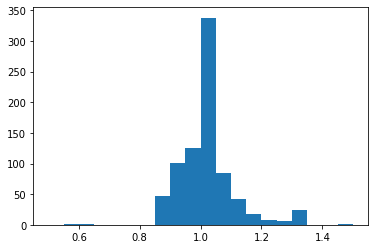

In [10]:
# 비중 값 histogram

arr = np.array(range(50,155,5))/100

plt.hist(y['비중'], bins=arr)

In [11]:
# 비중 값 outlier 실험 데이터 추출 (발포 과정으로 인해 비중이 매우 낮아진 실험 데이터)

data.loc[data['비중'] < 0.65]['비중']

157    0.588
158    0.589
159    0.614
Name: 비중, dtype: float64

In [40]:
# 같은 재료를 같은 비율로 섞은 (Same Input) 실험 데이터 추출

data_dup = data[X.duplicated(X.columns, keep=False)]

data_dup.shape

(186, 97)

In [41]:
# 재료 'P002' 를 사용한 실험 데이터만 추출

bit_mask = data_dup['P002'] != 0
rows_nonzero = data_dup.loc[bit_mask]

# 가독성을 위해, 추출된 데이터에서 한번도 사용되지 않은 재료 columns 제거

cols_drop = rows_nonzero.T[(rows_nonzero != 0).any()].T

# 이를 통해 Same Input 임에도 비중, 굴곡탄성률 등 물성치 Output 값이 다르게 나오는 것을 확인.

cols_drop.shape

(6, 13)